In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df = pd.read_csv('Employee-Attrition.csv')

In [52]:
df.head()
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [16]:
num_cols = list(df.describe().columns)
col_categorical = list(set(df.columns).difference(num_cols))
remove_list = ['EmployeeCount','EmployeeNumber','StandardHours']
col_numerical = [e for e in num_cols if e not in remove_list]

<AxesSubplot: >

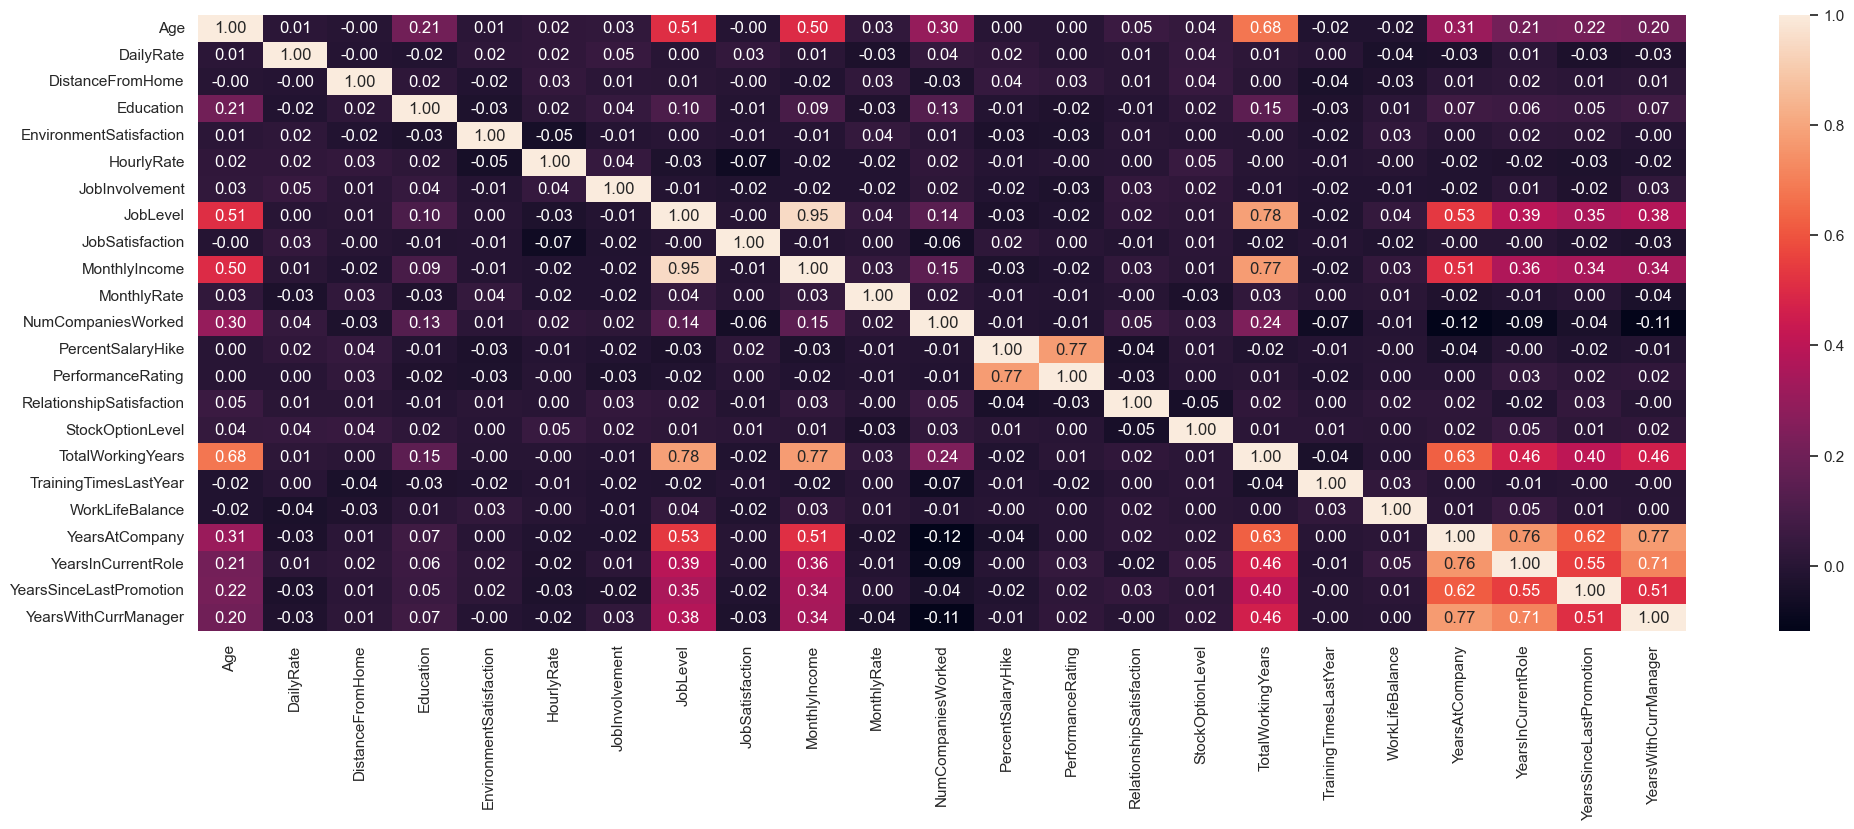

In [20]:
plt.figure(figsize=(24,8))
sns.heatmap(df[col_numerical].corr(),annot=True, fmt =".2f")

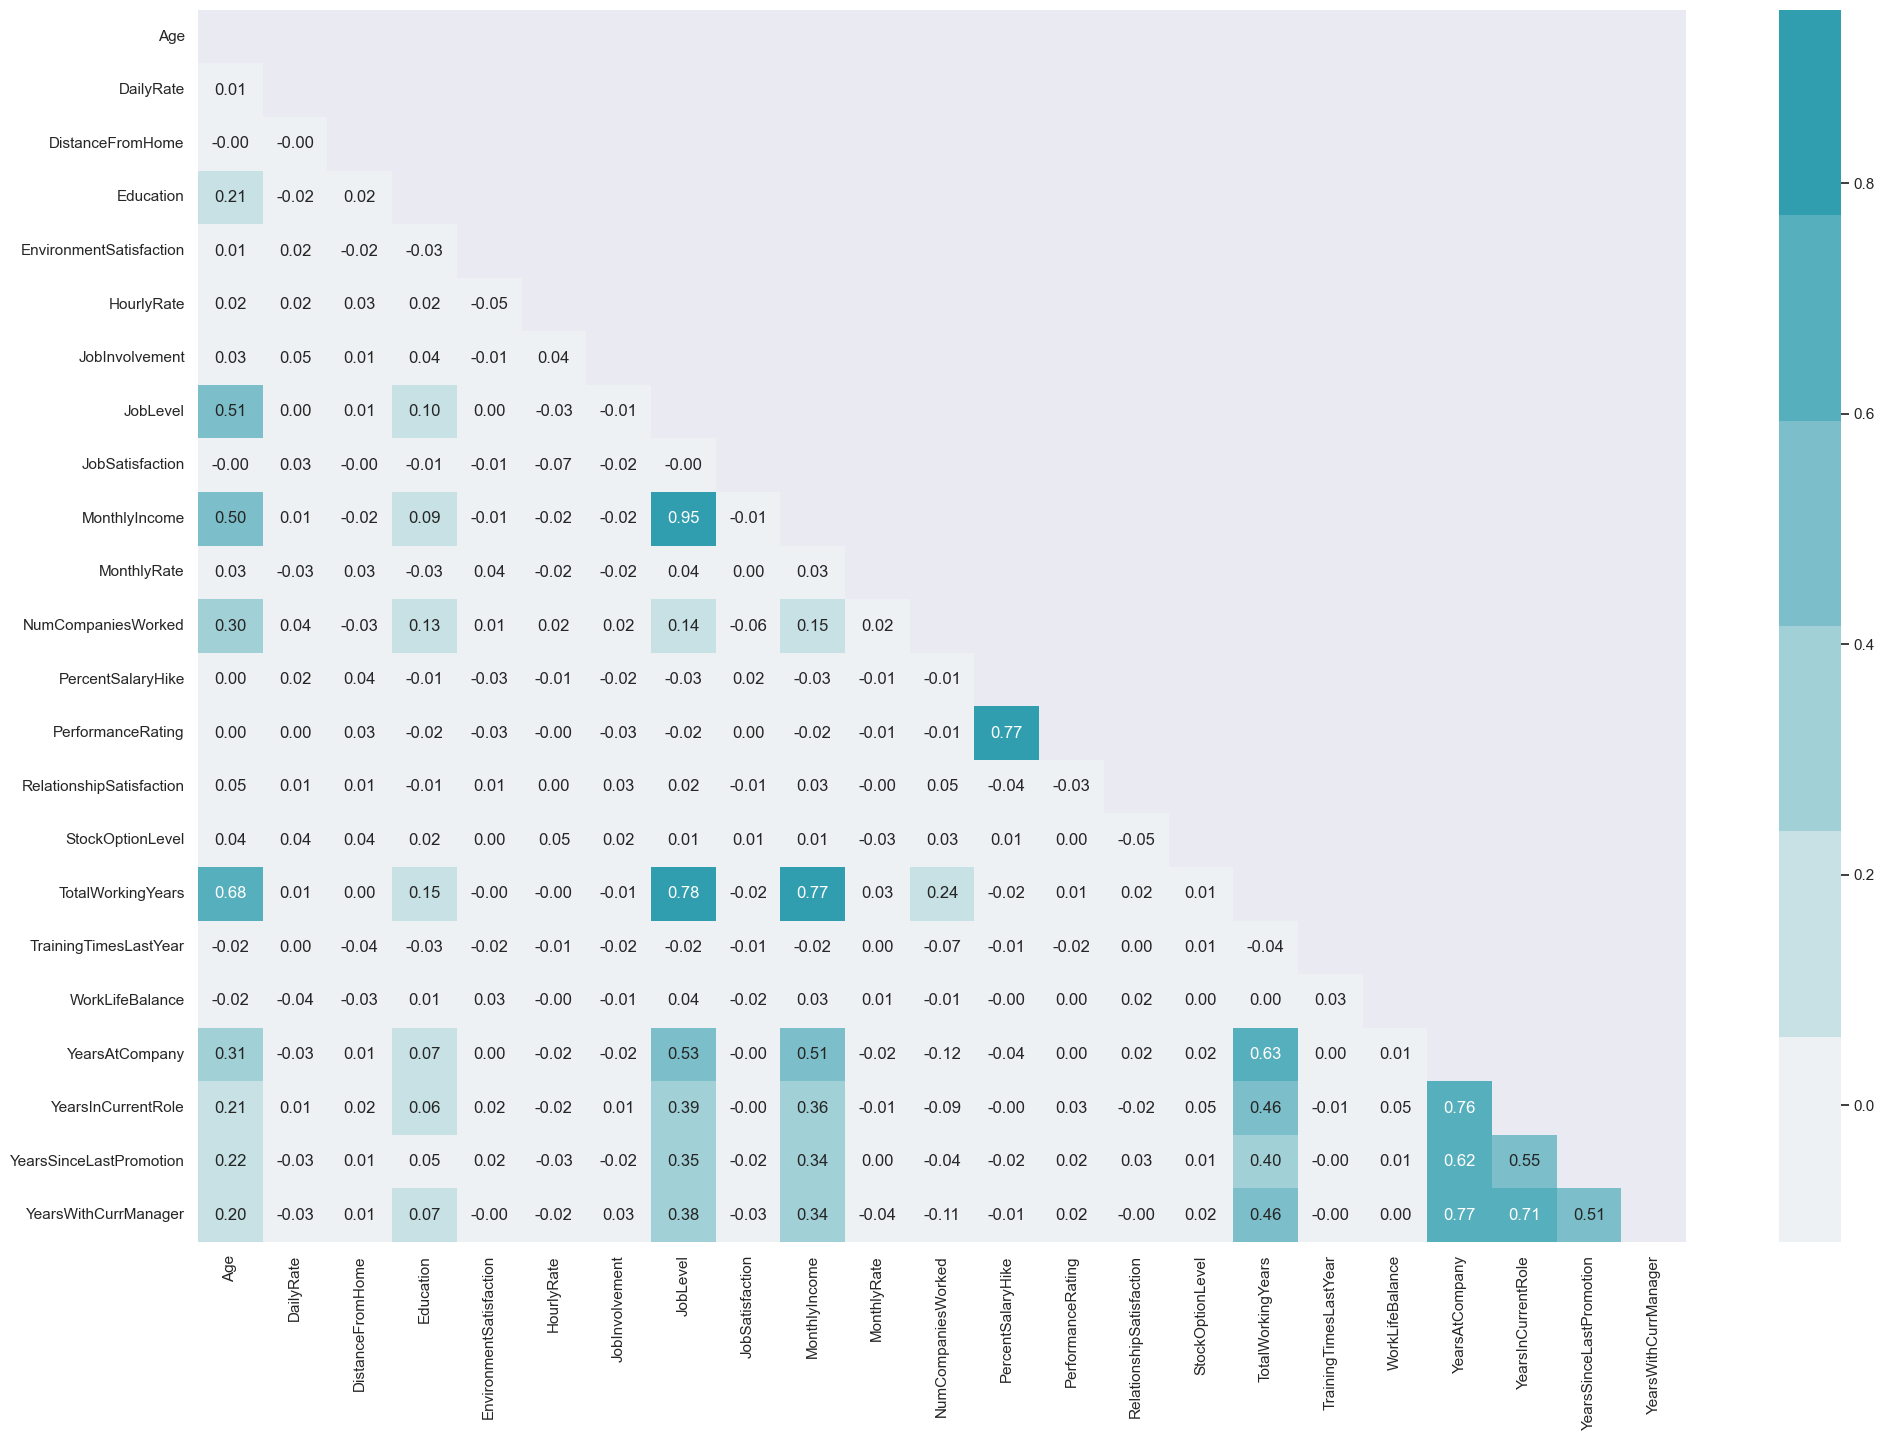

In [47]:
plt.figure(figsize=(24,16))
mask = np.zeros_like(df[col_numerical].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.light_palette((210,90,60), input ="husl")
sns.heatmap(df[col_numerical].corr(),
            annot=True,
            mask=mask,
            cmap = cmap,
            fmt=".2f");

In [69]:
col_categorical.sort()
df['Attrition'].unique()
attrition_to_num = {
    'Yes':1,
    'No':0
}
df['Attrition_num']=df['Attrition'].map(attrition_to_num)
df_cat = pd.get_dummies(df[col_categorical])
df_cat.head()
X = pd.concat([df[col_numerical],df_cat],axis=1)
y = df['Attrition_num']

<class 'pandas.core.series.Series'>
RangeIndex: 1470 entries, 0 to 1469
Series name: Attrition_num
Non-Null Count  Dtype
--------------  -----
1470 non-null   int64
dtypes: int64(1)
memory usage: 11.6 KB


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
print("Accuracy score is ",accuracy_score(y_train,clf.predict(X_train)))
print(classification_report(y_train,clf.predict(X_train)))
print(confusion_matrix(y_train,clf.predict(X_train)))

Accuracy score is  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00       196

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

[[980   0]
 [  0 196]]


In [87]:
print("Accuracy score is ",accuracy_score(y_test,clf.predict(X_test)))
print(classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,clf.predict(X_test)))

Accuracy score is  0.8027210884353742
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       253
           1       0.30      0.32      0.31        41

    accuracy                           0.80       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.81      0.80      0.80       294

[[223  30]
 [ 28  13]]
